# Mini Dollar Strategy - Data Analysis and Technical Indicators

This notebook demonstrates:
1. Loading market data
2. Exploratory data analysis
3. Technical indicators calculation
4. Pattern visualization

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from src.data.loaders.market_data import MarketDataLoader
from src.analysis.technical.enhanced_strategy import EnhancedTechnicalStrategy
from src.analysis.technical.strategy import TechnicalStrategy

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_palette('Set2')

## 1. Load and Prepare Market Data

In [2]:
# Initialize loader with explicit database path
loader = MarketDataLoader(db_path="../src/data/database/candles.db")

# Load last 6 months of data
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

# Carregando dados com intervalo de 5 minutos
data = loader.get_minute_data(
    interval=5,  # intervalo de 5 minutos
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d')
)

print(f"Loaded {len(data)} candles")
data.head()

INFO:src.data.loaders.market_data:Using database: c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\src\data\database\candles.db
2024-12-05 14:01:20.400 | INFO     | src.data.loaders.market_data:get_minute_data:78 - Attempting to load data from c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\src\data\database\candles.db
2024-12-05 14:01:20.401 | INFO     | src.data.loaders.market_data:get_minute_data:87 - Executing query: 
        SELECT * FROM candles 
        WHERE time >= '2024-06-08' 
        AND time <= '2024-12-05' 
        ORDER BY time ASC
        
2024-12-05 14:01:20.959 | INFO     | src.data.loaders.market_data:get_minute_data:98 - Data loaded: 68334 records


Loaded 68334 candles


,open,high,low,close,tick_volume,spread,volume
time,,,,,,,
2024-06-10 09:00:00,5470.699,5470.699,5460.996,5460.996,3364,1,14801
2024-06-10 09:01:00,5461.506,5464.060,5457.931,5457.931,8070,1,27893
2024-06-10 09:02:00,5457.931,5458.953,5453.335,5454.867,4973,1,17528
2024-06-10 09:03:00,5455.378,5455.378,5449.249,5451.292,4611,1,16765
2024-06-10 09:04:00,5450.781,5452.314,5448.228,5449.760,4107,1,16371


### Data Quality Analysis

In [3]:
def analyze_data_quality(df):
    """Analyze data quality and print report."""
    print("Data Quality Report:\n")
    
    # Basic information
    print("1. Basic Information:")
    print(f"Total records: {len(df)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Columns: {', '.join(df.columns)}\n")
    
    # Missing values
    print("2. Missing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found\n")
    
    # Data statistics
    print("3. Data Statistics:")
    print(df.describe())

# Run analysis
analyze_data_quality(data)

Data Quality Report:

1. Basic Information:
Total records: 68334
Date range: 2024-06-10 09:00:00 to 2024-11-29 18:29:00
Columns: open, high, low, close, tick_volume, spread, volume

2. Missing Values:
No missing values found

3. Data Statistics:
               open          high           low         close   tick_volume  \
count  68334.000000  68334.000000  68334.000000  68334.000000  68334.000000   
mean    5663.407222   5664.807216   5662.034436   5663.415227   1484.876504   
std      119.818559    119.967633    119.681518    119.813877   1545.518100   
min     5441.078000   5443.631000   5439.546000   5441.078000      7.000000   
25%     5560.244000   5561.723000   5559.051000   5560.298000    466.000000   
50%     5660.841000   5662.282500   5659.517000   5660.841000    964.000000   
75%     5746.136000   5747.541000   5744.997000   5746.136000   1953.000000   
max     6136.500000   6138.000000   6127.500000   6136.000000  23030.000000   

             spread        volume  
count 

## 2. Calculate Technical Indicators

In [4]:
# Initialize strategy
strategy = TechnicalStrategy()

# Calculate indicators
analysis = strategy.calculate_indicators(data)

# Show available indicators
print("Available indicators:")
indicators = [col for col in analysis.columns if col not in ['open', 'high', 'low', 'close', 'volume']]
print(indicators)
analysis.head()

2024-12-05 14:01:25.015 | INFO     | src.analysis.technical.strategy:__init__:103 - Initialized Enhanced TechnicalStrategy with EMA moving averages


Available indicators:
['tick_volume', 'spread', 'rsi', 'ma_fast', 'ma_slow', 'adx', 'plus_di', 'minus_di', 'volume_ma', 'volume_ratio', 'obv', 'macd', 'macd_signal', 'macd_hist', 'bb_upper', 'bb_middle', 'bb_lower', 'atr', 'dynamic_stop_loss', 'dynamic_take_profit', 'trailing_stop', 'take_profit_level1', 'take_profit_level2', 'take_profit_level3', 'break_even_level']


,open,high,low,close,tick_volume,spread,volume,rsi,ma_fast,ma_slow,...,bb_middle,bb_lower,atr,dynamic_stop_loss,dynamic_take_profit,trailing_stop,take_profit_level1,take_profit_level2,take_profit_level3,break_even_level
time,,,,,,,,,,,,,,,,,,,,,
2024-06-10 09:00:00,5470.699,5470.699,5460.996,5460.996,3364,1,14801,16.667347,5450.951667,5447.449571,...,5447.7426,5437.404148,4.3775,8.755,13.1325,5438.08675,5457.7855,5464.35175,5470.918,5449.0305
2024-06-10 09:01:00,5461.506,5464.060,5457.931,5457.931,8070,1,27893,16.667347,5450.951667,5447.449571,...,5447.7426,5437.404148,4.3775,8.755,13.1325,5438.08675,5457.7855,5464.35175,5470.918,5449.0305
2024-06-10 09:02:00,5457.931,5458.953,5453.335,5454.867,4973,1,17528,16.667347,5450.951667,5447.449571,...,5447.7426,5437.404148,4.3775,8.755,13.1325,5438.08675,5457.7855,5464.35175,5470.918,5449.0305
2024-06-10 09:03:00,5455.378,5455.378,5449.249,5451.292,4611,1,16765,16.667347,5450.951667,5447.449571,...,5447.7426,5437.404148,4.3775,8.755,13.1325,5438.08675,5457.7855,5464.35175,5470.918,5449.0305
2024-06-10 09:04:00,5450.781,5452.314,5448.228,5449.760,4107,1,16371,16.667347,5450.951667,5447.449571,...,5447.7426,5437.404148,4.3775,8.755,13.1325,5438.08675,5457.7855,5464.35175,5470.918,5449.0305


## 3. Visualize Price Action and Indicators

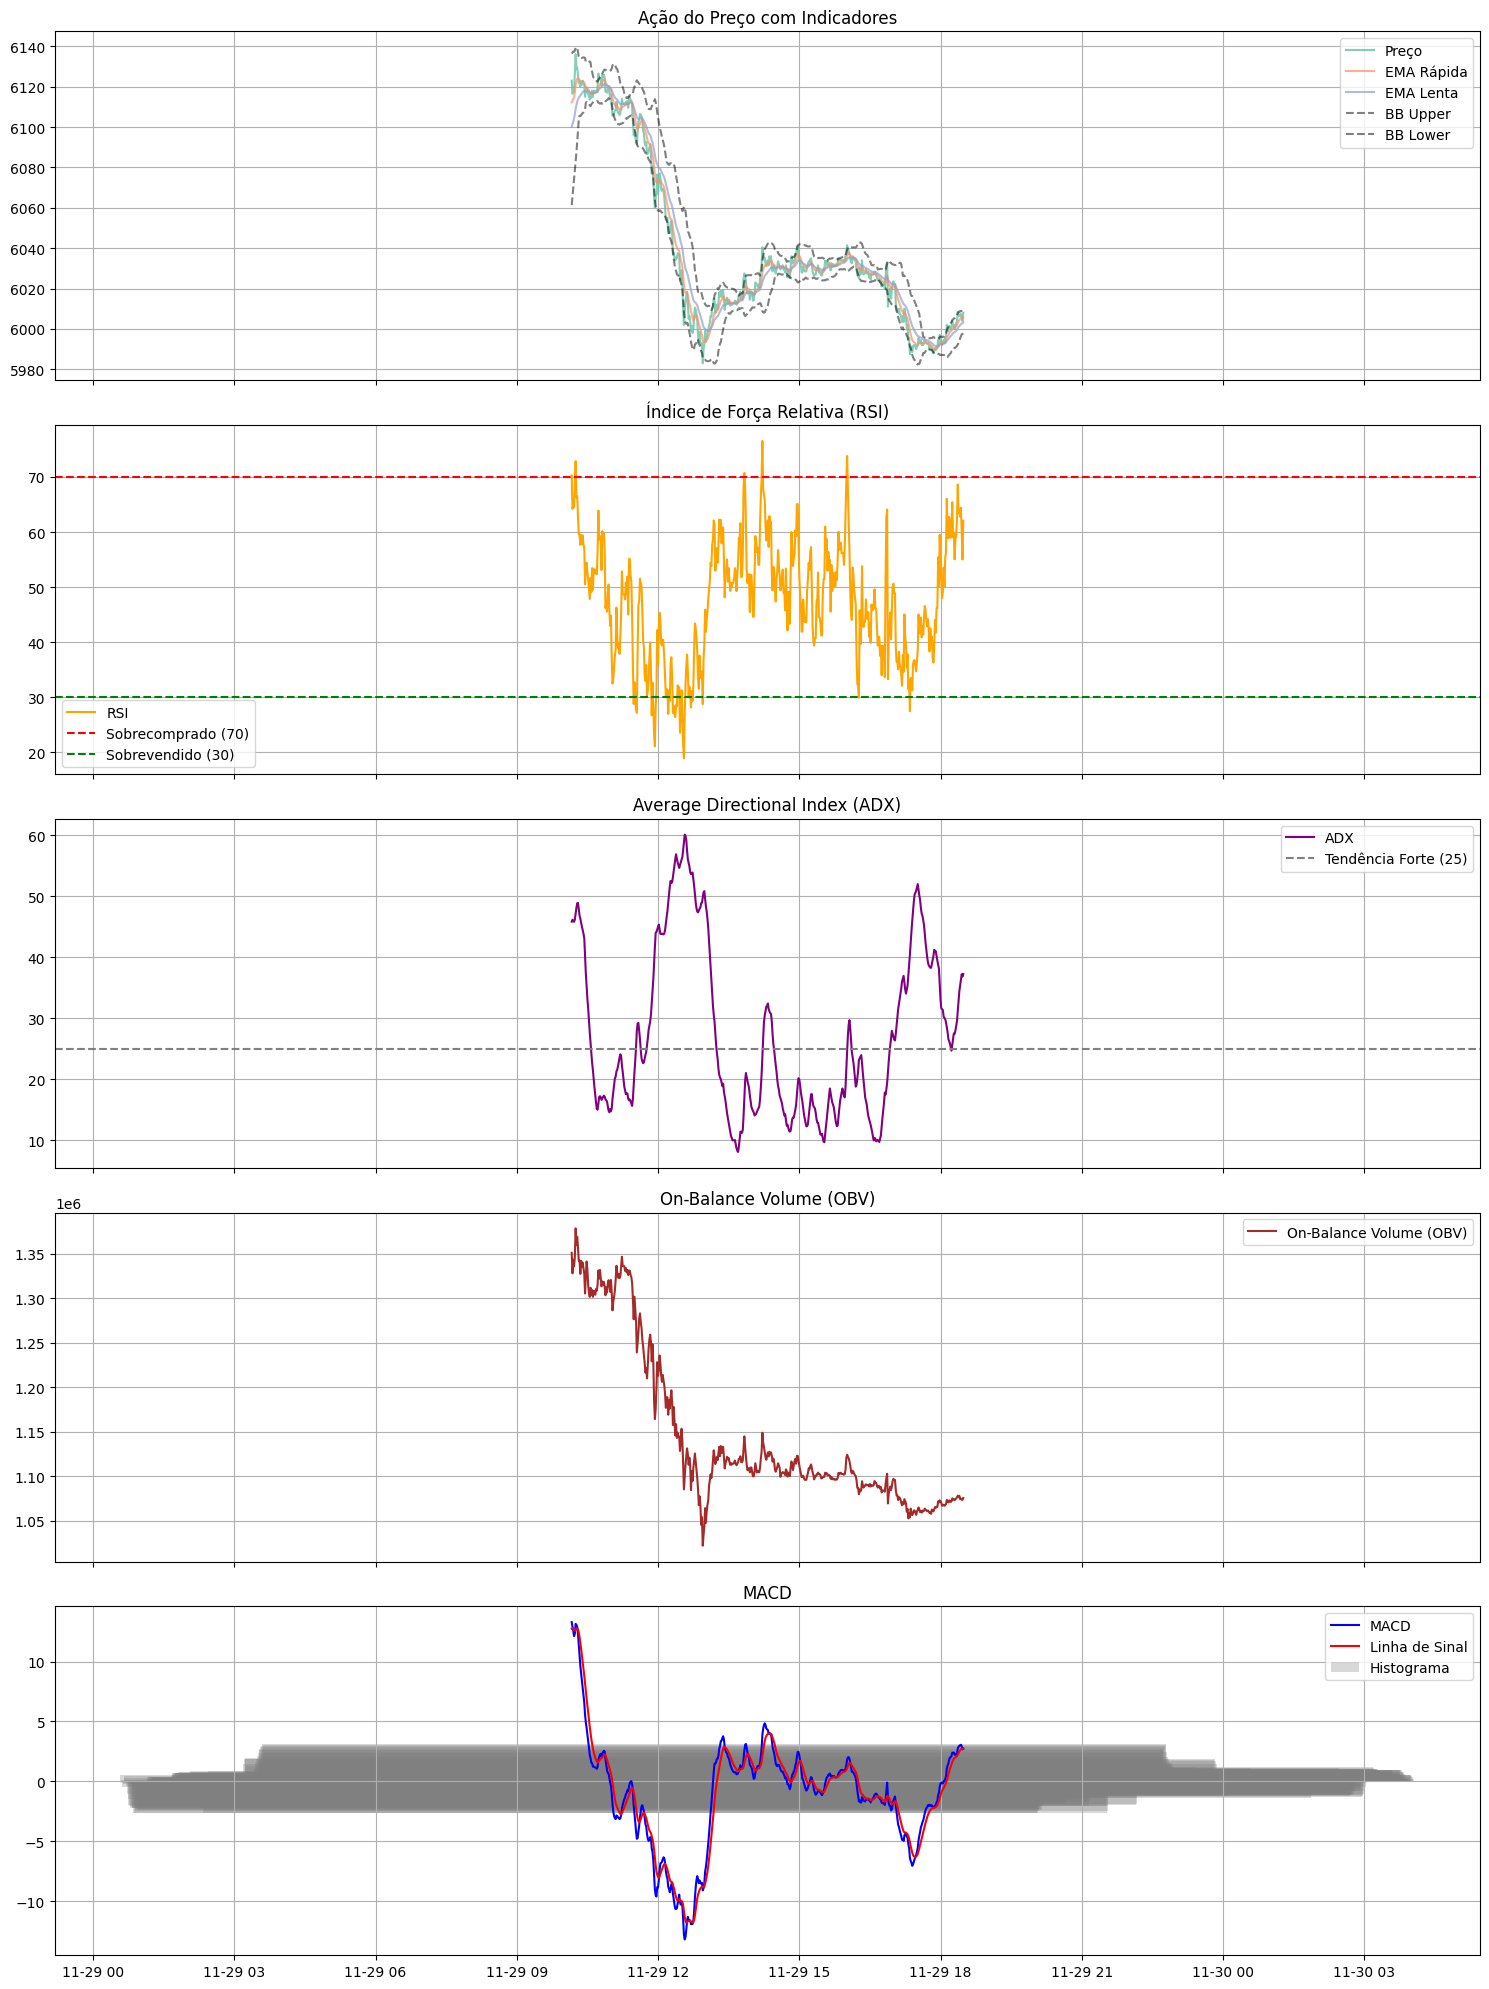

In [5]:
def plot_price_and_indicators(df, window=500):
    """Plot comprehensive price and indicator analysis."""
    recent = df.tail(window)
    
    # Criar figura com subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
    
    # 1. Preço e Médias Móveis Exponenciais
    ax1 = axes[0]
    ax1.plot(recent.index, recent['close'], label='Preço', alpha=0.8)
    ax1.plot(recent.index, recent['ma_fast'], label='EMA Rápida', alpha=0.7)
    ax1.plot(recent.index, recent['ma_slow'], label='EMA Lenta', alpha=0.7)
    ax1.plot(recent.index, recent['bb_upper'], 'k--', label='BB Upper', alpha=0.5)
    ax1.plot(recent.index, recent['bb_lower'], 'k--', label='BB Lower', alpha=0.5)
    ax1.set_title('Ação do Preço com Indicadores')
    ax1.legend()
    ax1.grid(True)
    
    # 2. RSI
    ax2 = axes[1]
    ax2.plot(recent.index, recent['rsi'], label='RSI', color='orange')
    ax2.axhline(y=70, color='r', linestyle='--', label='Sobrecomprado (70)')
    ax2.axhline(y=30, color='g', linestyle='--', label='Sobrevendido (30)')
    ax2.set_title('Índice de Força Relativa (RSI)')
    ax2.legend()
    ax2.grid(True)
    
    # 3. ADX
    ax3 = axes[2]
    ax3.plot(recent.index, recent['adx'], label='ADX', color='purple')
    ax3.axhline(y=25, color='grey', linestyle='--', label='Tendência Forte (25)')
    ax3.set_title('Average Directional Index (ADX)')
    ax3.legend()
    ax3.grid(True)
    
    # 4. OBV
    ax4 = axes[3]
    ax4.plot(recent.index, recent['obv'], label='On-Balance Volume (OBV)', color='brown')
    ax4.set_title('On-Balance Volume (OBV)')
    ax4.legend()
    ax4.grid(True)
    
    # 5. MACD
    ax5 = axes[4]
    ax5.plot(recent.index, recent['macd'], label='MACD', color='blue')
    ax5.plot(recent.index, recent['macd_signal'], label='Linha de Sinal', color='red')
    ax5.bar(recent.index, recent['macd_hist'], alpha=0.3, label='Histograma', color='grey')
    ax5.set_title('MACD')
    ax5.legend()
    ax5.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plotar a análise
plot_price_and_indicators(analysis)

## 4. Analyze Potential Trading Signals

2024-12-05 14:03:28.536 | INFO     | src.analysis.technical.strategy:generate_signals:266 - Generated trading signals with complete strategy


Signal Distribution:
Buy signals (1): 0
Sell signals (-1): 0
Neutral (0): 68334

Signal Transitions:
final_signal
0.0    68333
Name: count, dtype: int64


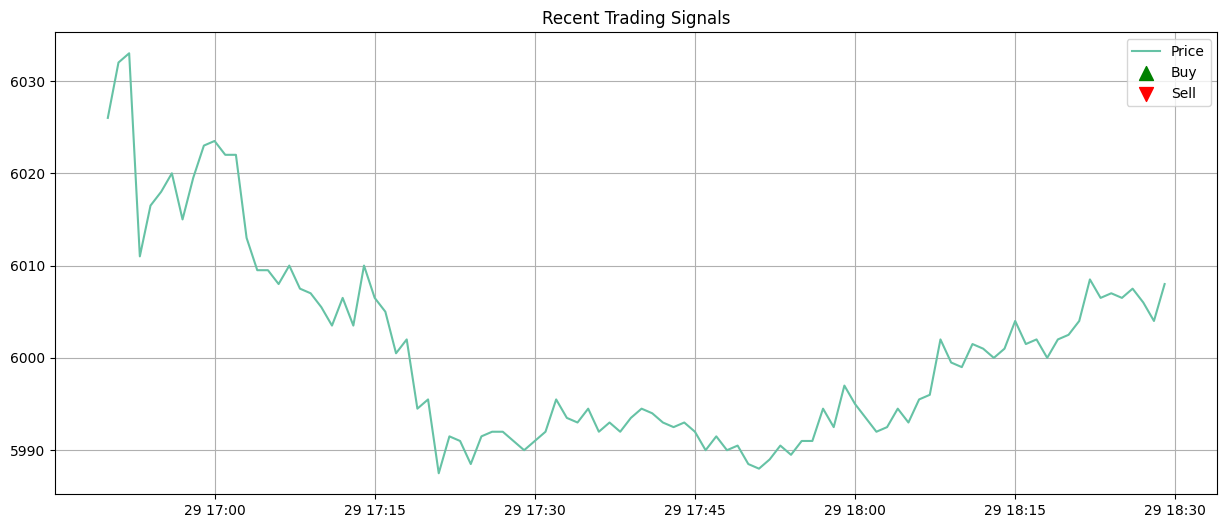

In [6]:
# Generate trading signals
signals = strategy.generate_signals(analysis)

def analyze_trading_signals(df):
    """Analyze generated trading signals."""
    # Count signals
    signal_counts = df['final_signal'].value_counts()
    print("Signal Distribution:")
    print(f"Buy signals (1): {signal_counts.get(1, 0)}")
    print(f"Sell signals (-1): {signal_counts.get(-1, 0)}")
    print(f"Neutral (0): {signal_counts.get(0, 0)}\n")
    
    # Signal transitions
    transitions = df['final_signal'].diff().value_counts()
    print("Signal Transitions:")
    print(transitions)

# Analyze signals
analyze_trading_signals(signals)

# Plot recent signals
recent = signals.tail(100)
plt.figure(figsize=(15, 6))
plt.plot(recent.index, recent['close'], label='Price')
plt.scatter(recent[recent['final_signal'] == 1].index, \
            recent[recent['final_signal'] == 1]['close'],
            marker='^', c='g', s=100, label='Buy')
plt.scatter(recent[recent['final_signal'] == -1].index,
            recent[recent['final_signal'] == -1]['close'],
            marker='v', c='r', s=100, label='Sell')
plt.title('Recent Trading Signals')
plt.legend()
plt.grid(True)
plt.show()

## Enhanced Strategy

In [7]:
# Carregar os dados usando o loader
data = loader.load_data()

# Renomear 'real_volume' para 'volume'
data = data.rename(columns={'real_volume': 'volume'})

# Verifique se 'data' é um DataFrame
print(type(data))  # Deve retornar <class 'pandas.core.frame.DataFrame'>

INFO:src.data.loaders.market_data:Attempting to load data from c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\src\data\database\candles.db
INFO:src.data.loaders.market_data:Executing query: SELECT * FROM candles ORDER BY time ASC
INFO:src.data.loaders.market_data:Data loaded: 94538 records


<class 'pandas.core.frame.DataFrame'>


2024-12-05 14:03:44.560 | INFO     | src.analysis.technical.strategy:__init__:103 - Initialized Enhanced TechnicalStrategy with EMA moving averages
INFO:src.analysis.technical.enhanced_strategy:EnhancedTechnicalStrategy inicializada.
2024-12-05 14:03:48.163 | INFO     | src.analysis.technical.strategy:generate_signals:266 - Generated trading signals with complete strategy
INFO:src.analysis.technical.enhanced_strategy:Modelo de ML treinado.
INFO:src.analysis.technical.enhanced_strategy:Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.43      0.56      0.48      8032
           0       0.21      0.01      0.02      2794
           1       0.43      0.44      0.43      8082

    accuracy                           0.42     18908
   macro avg       0.36      0.33      0.31     18908
weighted avg       0.39      0.42      0.39     18908



Available indicators:
['rsi', 'ma_fast', 'ma_slow', 'adx', 'plus_di', 'minus_di', 'volume_ma', 'volume_ratio', 'obv', 'macd', 'macd_signal', 'macd_hist', 'bb_upper', 'bb_middle', 'bb_lower', 'atr', 'dynamic_stop_loss', 'dynamic_take_profit', 'trailing_stop', 'take_profit_level1', 'take_profit_level2', 'take_profit_level3', 'break_even_level', 'signal', 'buy_score', 'sell_score', 'final_signal', 'stop_loss', 'take_profit', 'ml_signal', 'final_signal_ml']


,open,high,low,close,tick_volume,spread,volume,rsi,ma_fast,ma_slow,...,take_profit_level3,break_even_level,signal,buy_score,sell_score,final_signal,stop_loss,take_profit,ml_signal,final_signal_ml
time,,,,,,,,,,,,,,,,,,,,,
2024-03-22 12:57:00,5136.406,5137.435,5134.862,5135.376,1605,1,8314,89.476166,5160.252,5167.235524,...,5205.789571,5179.202429,0,2.5,2.0,0,10.634857,15.952286,1,0
2024-04-01 09:00:00,5158.485,5161.051,5157.971,5160.538,2486,1,11091,89.476166,5160.252,5167.235524,...,5205.789571,5179.202429,0,2.0,2.0,0,10.634857,15.952286,1,0
2024-04-01 09:01:00,5161.051,5162.591,5157.971,5160.025,4655,1,24795,89.476166,5160.252,5167.235524,...,5205.789571,5179.202429,0,2.0,2.0,0,10.634857,15.952286,1,0
2024-04-01 09:02:00,5160.538,5160.538,5157.971,5160.025,1717,1,9498,89.476166,5160.252,5167.235524,...,5205.789571,5179.202429,0,2.0,2.0,0,10.634857,15.952286,1,0
2024-04-01 09:03:00,5160.538,5162.078,5158.998,5162.078,1969,1,9934,89.476166,5160.252,5167.235524,...,5205.789571,5179.202429,0,2.0,2.0,0,10.634857,15.952286,1,0


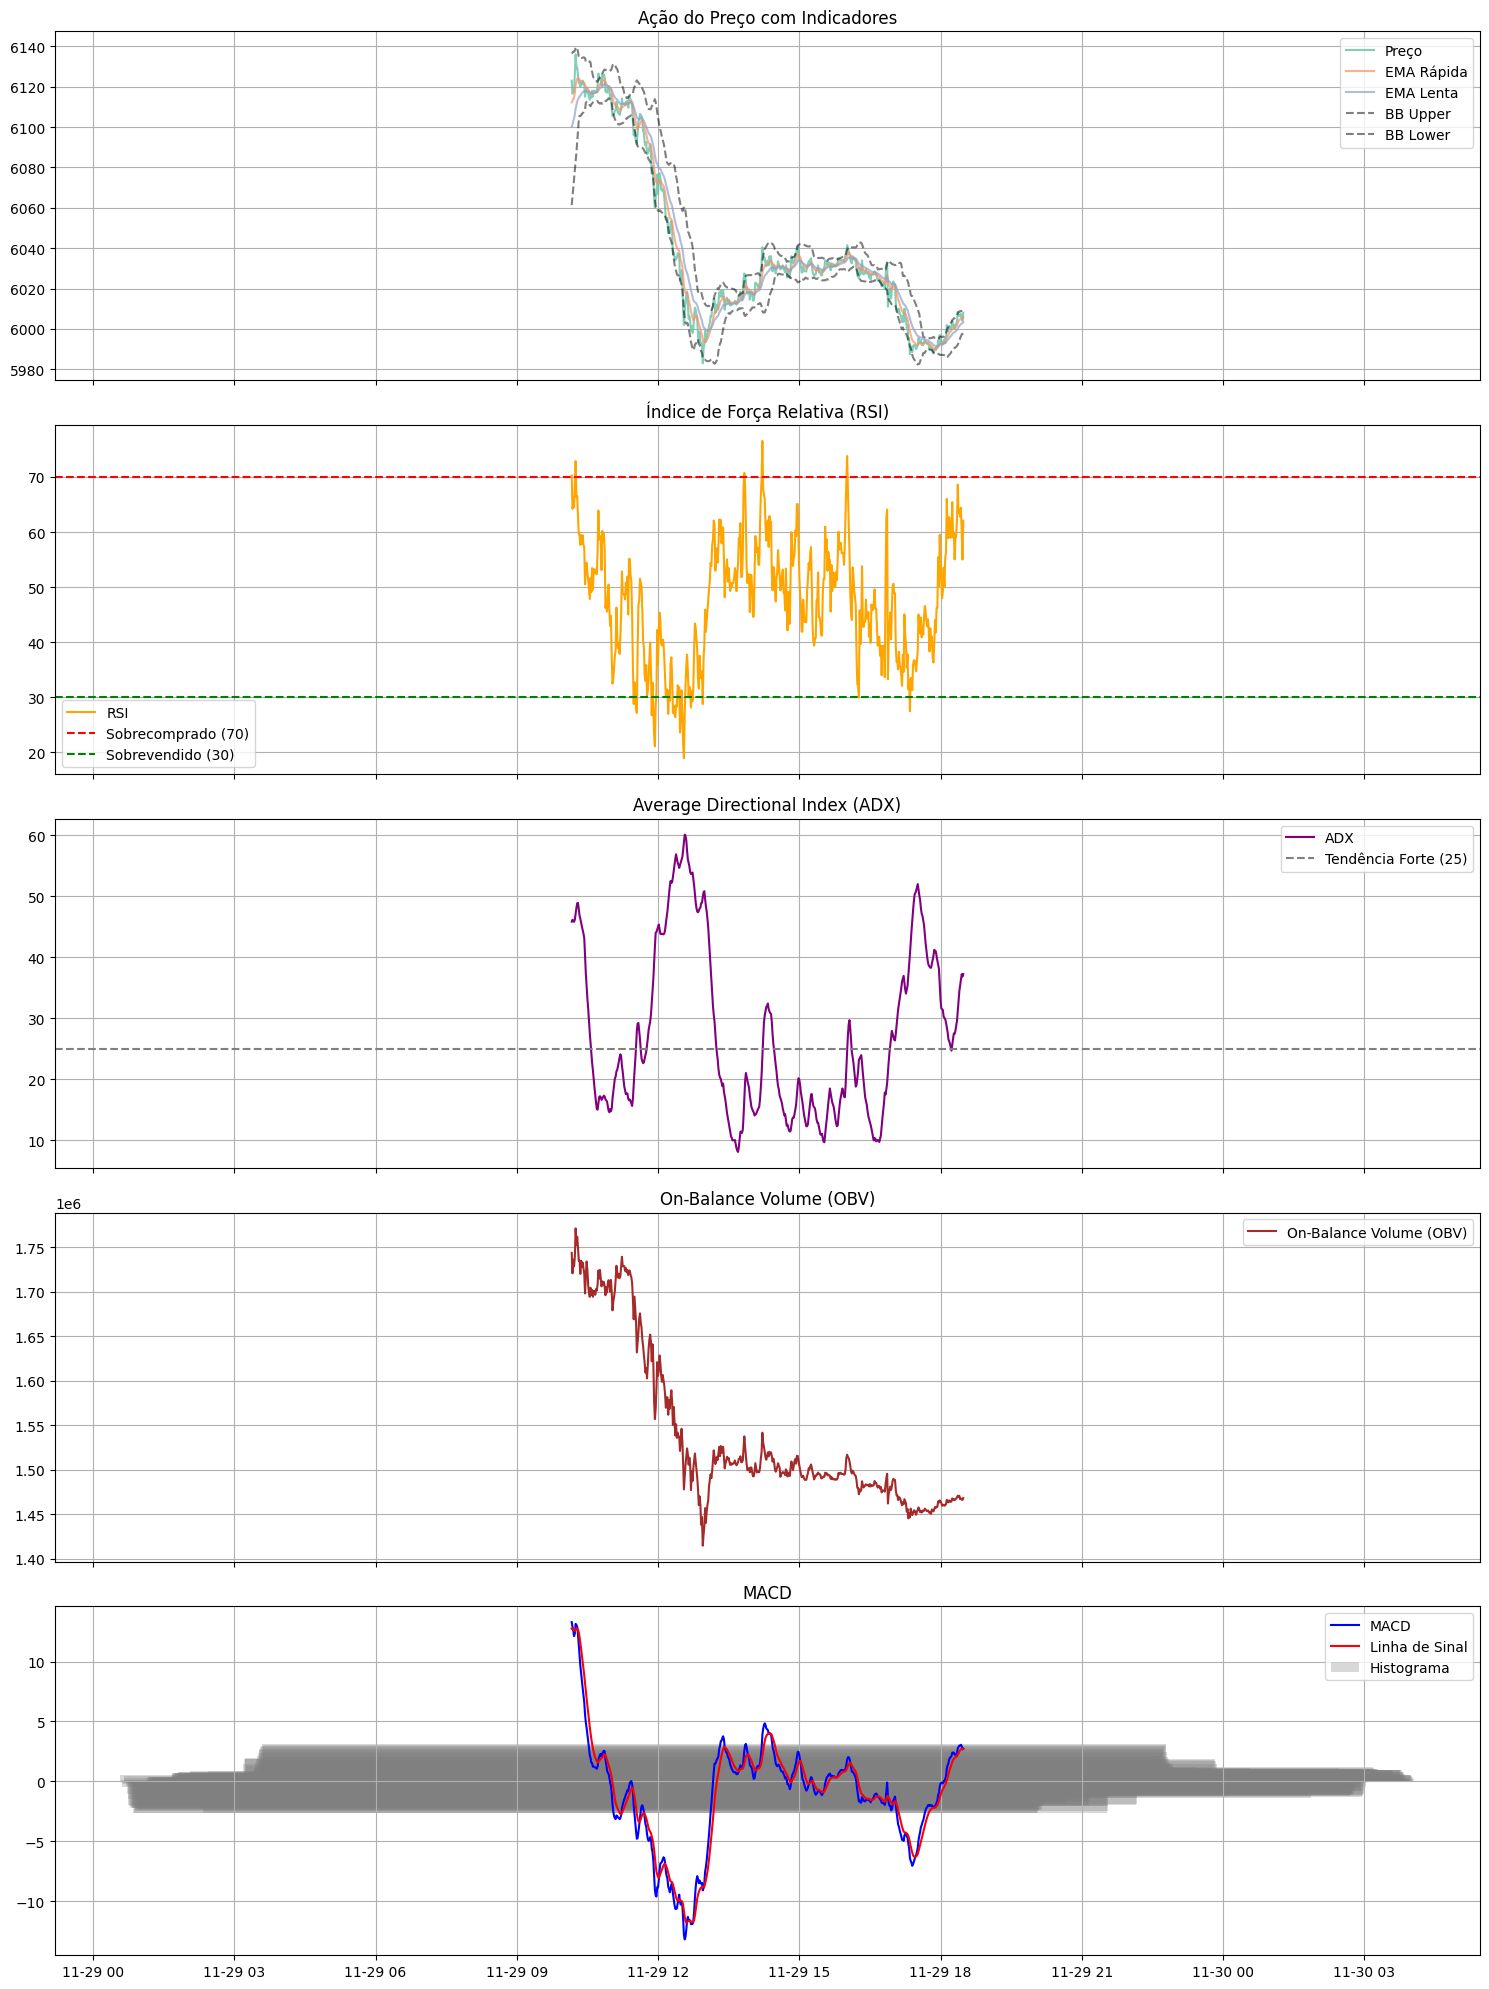

Signal Distribution:
Buy signals (1): 0
Sell signals (-1): 0
Neutral (0): 94538

Signal Transitions:
final_signal_ml
0.0    94537
Name: count, dtype: int64


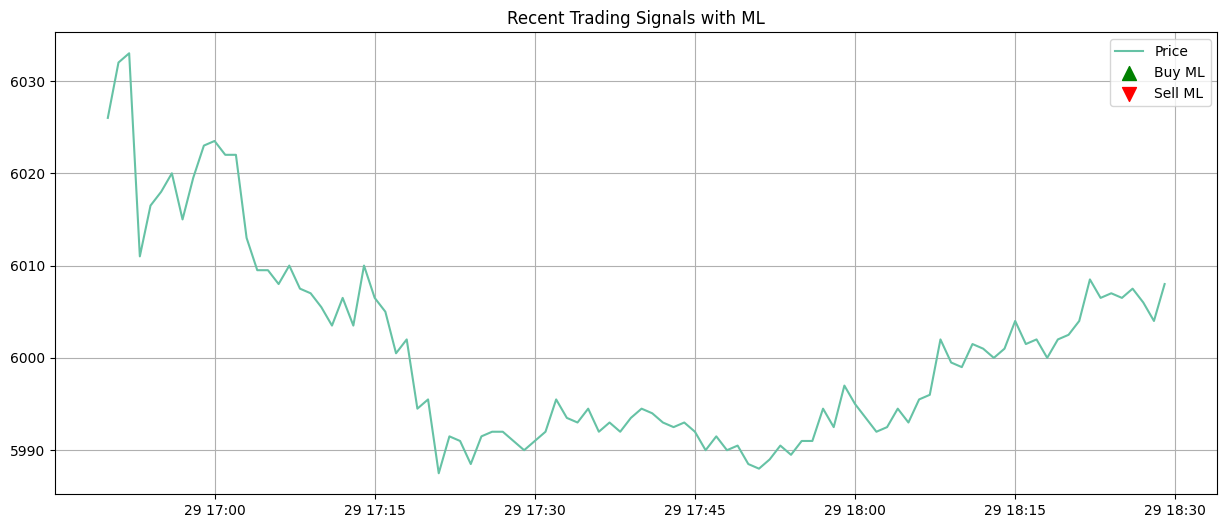

In [8]:
# Inicializar a estratégia aprimorada
enhanced_strategy = EnhancedTechnicalStrategy()

# Executar a estratégia completa com ML
enhanced_analysis = enhanced_strategy.run_enhanced_strategy(data)

# Mostrar os indicadores disponíveis
print("Available indicators:")
indicators = [col for col in enhanced_analysis.columns if col not in ['open', 'high', 'low', 'close', 'volume', 'tick_volume', 'spread', 'label']]
print(indicators)
display(enhanced_analysis.head())

# Visualizar price action e indicadores
plot_price_and_indicators(enhanced_analysis)

# Analisar sinais de trading
def analyze_trading_signals(df):
    """Analyze generated trading signals."""
    # Count signals
    signal_counts = df['final_signal_ml'].value_counts()
    print("Signal Distribution:")
    print(f"Buy signals (1): {signal_counts.get(1, 0)}")
    print(f"Sell signals (-1): {signal_counts.get(-1, 0)}")
    print(f"Neutral (0): {signal_counts.get(0, 0)}\n")
    
    # Signal transitions
    transitions = df['final_signal_ml'].diff().value_counts()
    print("Signal Transitions:")
    print(transitions)

# Analisar sinais aprimorados
analyze_trading_signals(enhanced_analysis)

# Plotar sinais recentes
recent = enhanced_analysis.tail(100)
plt.figure(figsize=(15, 6))
plt.plot(recent.index, recent['close'], label='Price')
plt.scatter(recent[recent['final_signal_ml'] == 1].index, 
            recent[recent['final_signal_ml'] == 1]['close'],
            marker='^', c='g', s=100, label='Buy ML')
plt.scatter(recent[recent['final_signal_ml'] == -1].index,
            recent[recent['final_signal_ml'] == -1]['close'],
            marker='v', c='r', s=100, label='Sell ML')
plt.title('Recent Trading Signals with ML')
plt.legend()
plt.grid(True)
plt.show()